In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth,
# followed by the flatten and multiple dense layers

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)             

In [5]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
# Convert the images to grayscale and resize to (28, 28)
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_train_gray = tf.image.resize(x_train_gray, size=(28, 28))

x_test_gray = tf.image.rgb_to_grayscale(x_test)
x_test_gray = tf.image.resize(x_test_gray, size=(28, 28))


In [7]:
# Reshape y_train and y_test to make them compatible with the model
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [8]:
# Normalize the pixel values to a range of 0 to 1
x_train_gray, x_test_gray = x_train_gray / 255.0, x_test_gray / 255.0

In [9]:
# Compile the model
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [10]:
# Train the model
history = CNN.fit(x_train_gray, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 12s 15ms/step - loss: 1.9683 - accuracy: 0.2750 - val_loss: 1.7758 - val_accuracy: 0.3472
Epoch 2/10
704/704 [==============================] - 10s 14ms/step - loss: 1.7214 - accuracy: 0.3751 - val_loss: 1.7093 - val_accuracy: 0.3778
Epoch 3/10
704/704 [==============================] - 9s 13ms/step - loss: 1.6223 - accuracy: 0.4145 - val_loss: 1.5745 - val_accuracy: 0.4208
Epoch 4/10
704/704 [==============================] - 9s 13ms/step - loss: 1.5423 - accuracy: 0.4445 - val_loss: 1.5070 - val_accuracy: 0.4552
Epoch 5/10
704/704 [==============================] - 10s 14ms/step - loss: 1.4901 - accuracy: 0.4670 - val_loss: 1.4822 - val_accuracy: 0.4714
Epoch 6/10
704/704 [==============================] - 10s 14ms/step - loss: 1.4465 - accuracy: 0.4850 - val_loss: 1.4211 - val_accuracy: 0.4954
Epoch 7/10
704/704 [==============================] - 9s 12ms/step - loss: 1.4109 - accuracy: 0.4980 - val_loss: 1.4564 - val_accuracy: 0.

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = CNN.evaluate(x_test_gray, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 1.3517 - accuracy: 0.5166
Test accuracy: 0.5166000127792358


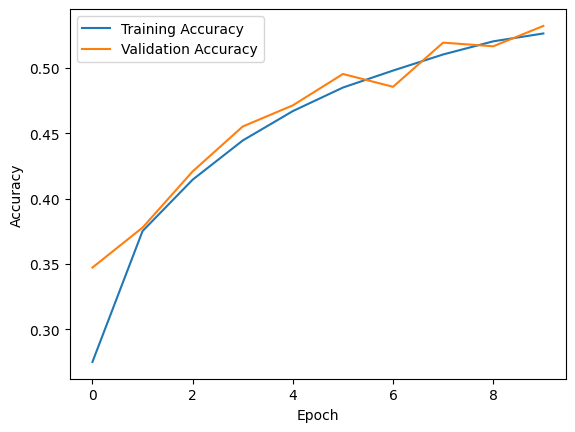

In [14]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
